In [2]:
# Basic building-block packages
import numpy as np
from numpy import heaviside as th

# For numerical solutions of ODEs
from scipy.integrate import solve_ivp

# Some fancy-smancy maths!! (not really)
from scipy.stats import linregress
from numpy.linalg import norm

# For pretty-pretty graphs
import matplotlib.pyplot as plt
import matplotlib.gridspec as gs

# Quality of life shit
from tqdm import tqdm
import pickle

import scipy.fftpack as fft

import pandas as pd

## Data Reaeding

In [25]:
data = pd.read_csv("C:/users/cosin/chaos-osc.csv")
time = data['T']
X = data['Ch1']
Y = data['Ch2']
print(X[1])

-0.181491288


## Phase Diagram,FFT, Poincare

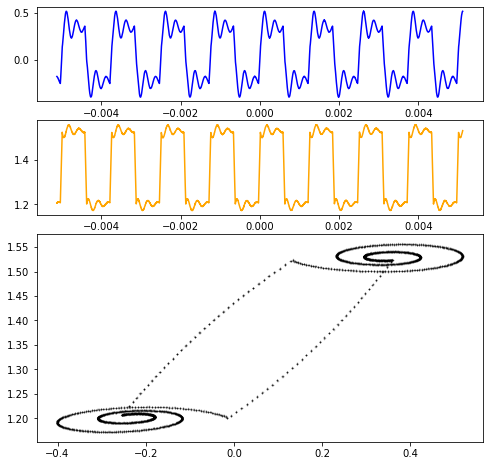

In [100]:
fig = plt.figure(figsize=(8,8))
grid = gs.GridSpec(4,1,wspace=0.1,)

axs1 = plt.subplot(grid[0,0])
axs2 = plt.subplot(grid[1,0])
axs3 = plt.subplot(grid[2:,0])

axs1.plot(time,X,color='blue')
axs2.plot(time,Y,color='orange')
axs3.scatter(X,Y, color="black", s=0.5, alpha=0.2)

plt.savefig('chaos.png')

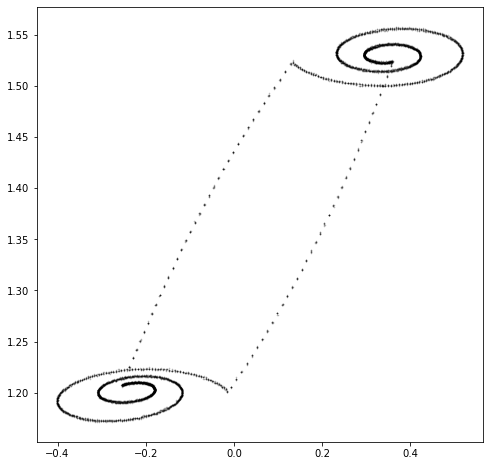

In [39]:
fig = plt.figure(figsize=(8,8))
plt.scatter(X,Y, color="black", s=0.5, alpha=0.2)
plt.savefig('chaos-phase.png')

C:\Users\cosin\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


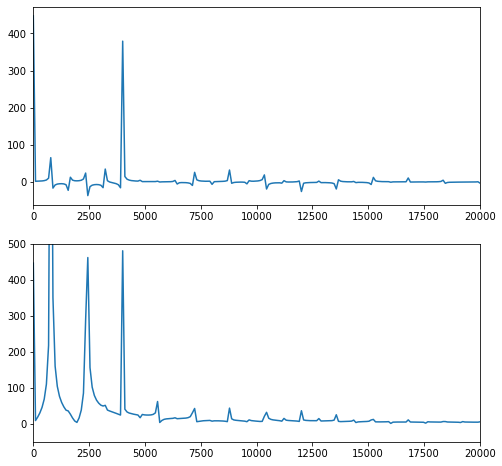

In [98]:
F=3.5
f=800

x=X.to_numpy()
y=Y.to_numpy()

Xf = fft.fft(x)
Yf = fft.fft(y)

samp = len(X)
tau = time[1]-time[0] # time interval

freq = fft.fftfreq(len(x), tau)

fig = plt.figure(figsize=(8,8))
grid = gs.GridSpec(2,1,wspace=0.1,)

axs1 = plt.subplot(grid[0,0])
axs2 = plt.subplot(grid[1,0])

axs1.set_xlim(left=0, right=20000, emit=True, auto=False)
axs2.set_xlim(left=0, right=20000, emit=True, auto=False)

axs2.set_ylim(bottom=-50, top=500, emit=True, auto=False)

axs1.plot(freq[freq>=0], Xf[freq>=0])
axs2.plot(freq[freq>=0], np.abs(Xf)[freq>=0])
                
plt.savefig('chaos-fft.png')